In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert
import openpyxl 
%run Funcoes.ipynb

In [2]:
soja_df = pd.read_excel(r"C:\Users\Lenovo\Documents\MeusProjetos\Analise-Sincronia-SeriesTemporais-Soja\Excel Preço local Barreiras.xlsx")    #o r antes da string significa uma string raw em que o caminho do arquivo é lido normalmente
soja_df

,Data,Preço
0,2012-01-02,41.5
1,2012-01-03,41.5
2,2012-01-04,41.5
3,2012-01-05,41.5
4,2012-01-06,41.5
...,...,...
2508,2024-02-05,100.13
2509,2024-02-06,100.13
2510,2024-02-07,101.25
2511,2024-02-08,101.13


In [3]:
soja_df = soja_df.rename(columns={'Data':'DATA'})
soja_df = soja_df.set_index('DATA')
soja_df

,Preço
DATA,
2012-01-02,41.5
2012-01-03,41.5
2012-01-04,41.5
2012-01-05,41.5
2012-01-06,41.5
...,...
2024-02-05,100.13
2024-02-06,100.13
2024-02-07,101.25


In [4]:
soja_df['Preço'] = pd.to_numeric(soja_df['Preço'], errors='coerce')
soja_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2513 entries, 2012-01-02 to 2024-02-15
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Preço   2512 non-null   float64
dtypes: float64(1)
memory usage: 39.3 KB


In [5]:
soja_df.dropna(subset=['Preço'],inplace=True)
soja_df = soja_df.rename(columns={'Preço':'PRECOLOCAL'})
soja_df.iloc[1450:1470]

,PRECOLOCAL
DATA,
2019-09-20,72.00
2019-09-23,71.75
2019-09-24,71.75
2019-09-25,71.75
2019-09-26,71.75
2019-09-27,71.75
2019-09-30,73.00
2019-10-01,73.50
2019-10-02,74.00


In [6]:
futuro_df = pd.read_csv(r'C:\Users\Lenovo\Documents\MeusProjetos\Analise-Sincronia-SeriesTemporais-Soja\soybean-prices-historical-chart-data.csv')

futuro_df

,date,value
0,1968-12-05,2.4375
1,1968-12-06,2.4475
2,1968-12-09,2.4363
3,1968-12-10,2.4375
4,1968-12-11,2.4463
...,...,...
13912,2024-02-09,11.9600
13913,2024-02-12,11.9300
13914,2024-02-13,11.8700
13915,2024-02-14,11.6800


In [7]:
futuro_df = futuro_df.rename(columns={'date':'DATA', ' value':'PRECOFUTURO'})
futuro_df['DATA'] = pd.to_datetime(futuro_df['DATA'])
futuro_df.set_index('DATA', inplace=True)

futuro_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13917 entries, 1968-12-05 to 2024-02-15
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PRECOFUTURO  13917 non-null  float64
dtypes: float64(1)
memory usage: 217.5 KB


In [8]:
sojas_df = pd.merge(soja_df['PRECOLOCAL'], futuro_df, how='left', on='DATA')
sojas_df.loc['2022-01-14':'2022-01-20']

,PRECOLOCAL,PRECOFUTURO
DATA,,
2022-01-14,162.67,13.6975
2022-01-17,162.67,NaN
2022-01-18,162.67,13.6125
2022-01-19,156.50,13.9125
2022-01-20,154.00,14.2575


In [9]:
sojas_df.dropna(inplace=True)
sojas_df.loc['2022-01-14':'2022-01-20']

,PRECOLOCAL,PRECOFUTURO
DATA,,
2022-01-14,162.67,13.6975
2022-01-18,162.67,13.6125
2022-01-19,156.50,13.9125
2022-01-20,154.00,14.2575


In [10]:
from requests import get
url = "https://olinda.bcb.gov.br/olinda/servico/PTAX/versao/v1/odata/CotacaoDolarPeriodo(dataInicial=@dataInicial,dataFinalCotacao=@dataFinalCotacao)?@dataInicial='01-03-2012'&@dataFinalCotacao='02-15-2024'&$top=1000000&$format=json&$select=cotacaoCompra,dataHoraCotacao"
r = get(url)
r = r.json()
dolar_df = pd.DataFrame(r['value'])
dolar_df

,cotacaoCompra,dataHoraCotacao
0,1.8450,2012-01-03 13:06:40.81
1,1.8265,2012-01-04 13:09:47.168
2,1.8365,2012-01-05 13:15:24.169
3,1.8442,2012-01-06 13:09:54.909
4,1.8435,2012-01-09 13:03:03.456
...,...,...
3037,4.9602,2024-02-07 14:22:27.517
3038,4.9798,2024-02-08 15:58:03.35
3039,4.9711,2024-02-09 17:00:17.365
3040,4.9717,2024-02-14 16:08:18.894


In [11]:
dolar_df = dolar_df[['dataHoraCotacao','cotacaoCompra']].rename(columns={'cotacaoCompra':'DOLAR_PTAX', 'dataHoraCotacao':'DATA'}).copy()
dolar_df.DATA = pd.to_datetime(dolar_df.DATA).dt.strftime('%Y-%m-%d')
dolar_df.DATA = pd.to_datetime(dolar_df.DATA)
dolar_df.set_index('DATA', inplace=True)

In [12]:
result_df = pd.merge(sojas_df[['PRECOLOCAL', 'PRECOFUTURO']], dolar_df, on='DATA')
result_df

,PRECOLOCAL,PRECOFUTURO,DOLAR_PTAX
DATA,,,
2012-01-03,41.50,12.275,1.8450
2012-01-04,41.50,12.300,1.8265
2012-01-05,41.50,12.090,1.8365
2012-01-06,41.50,11.965,1.8442
2012-01-09,41.50,12.330,1.8435
...,...,...,...
2024-02-05,100.13,11.980,5.0047
2024-02-06,100.13,12.000,4.9681
2024-02-07,101.25,11.900,4.9602


In [13]:
conversao_saca_bushel = 2.2046
result_df.PRECOLOCAL = (result_df.PRECOLOCAL / result_df.DOLAR_PTAX) / conversao_saca_bushel
result_df

,PRECOLOCAL,PRECOFUTURO,DOLAR_PTAX
DATA,,,
2012-01-03,10.202860,12.275,1.8450
2012-01-04,10.306201,12.300,1.8265
2012-01-05,10.250083,12.090,1.8365
2012-01-06,10.207286,11.965,1.8442
2012-01-09,10.211162,12.330,1.8435
...,...,...,...
2024-02-05,9.075203,11.980,5.0047
2024-02-06,9.142060,12.000,4.9681
2024-02-07,9.259042,11.900,4.9602


In [14]:
result_df['BASIS'] = (result_df.PRECOLOCAL - result_df.PRECOFUTURO)*100
result_df

,PRECOLOCAL,PRECOFUTURO,DOLAR_PTAX,BASIS
DATA,,,,
2012-01-03,10.202860,12.275,1.8450,-207.214010
2012-01-04,10.306201,12.300,1.8265,-199.379879
2012-01-05,10.250083,12.090,1.8365,-183.991750
2012-01-06,10.207286,11.965,1.8442,-175.771418
2012-01-09,10.211162,12.330,1.8435,-211.883834
...,...,...,...,...
2024-02-05,9.075203,11.980,5.0047,-290.479668
2024-02-06,9.142060,12.000,4.9681,-285.793964
2024-02-07,9.259042,11.900,4.9602,-264.095828


In [15]:
# Calcular basis (diferença entre futuros e spot)
basis = result_df.PRECOLOCAL - result_df.PRECOFUTURO

# Calcular momentum (retorno acumulado)
momentum = result_df.PRECOLOCAL.pct_change().rolling(window=7).sum() #retorno acumulado nos últimos 7 dias

momentum


DATA
2012-01-03         NaN
2012-01-04         NaN
2012-01-05         NaN
2012-01-06         NaN
2012-01-09         NaN
                ...   
2024-02-05   -0.075980
2024-02-06   -0.095540
2024-02-07   -0.080713
2024-02-08   -0.046793
2024-02-15   -0.011275
Name: PRECOLOCAL, Length: 2454, dtype: float64

In [16]:
# Sinais de negociação com base no basis e momentum
sinais = pd.DataFrame(index=result_df.PRECOFUTURO.index)
sinais['Sinal_Compra'] = np.where((basis > 0) & (momentum > 0), 1, 0)  # Exemplo de condição de compra
sinais['Sinal_Venda'] = np.where((basis < 0) & (momentum < 0), -1, 0)  # Condição de venda

# Combinar os sinais de compra e venda para gerar o sinal final (1 para compra, -1 para venda)
sinais['Sinal_Final'] = sinais['Sinal_Compra'] + sinais['Sinal_Venda']
# Exemplo de condição de venda: vender se basis for negativo e momentum estiver caindo


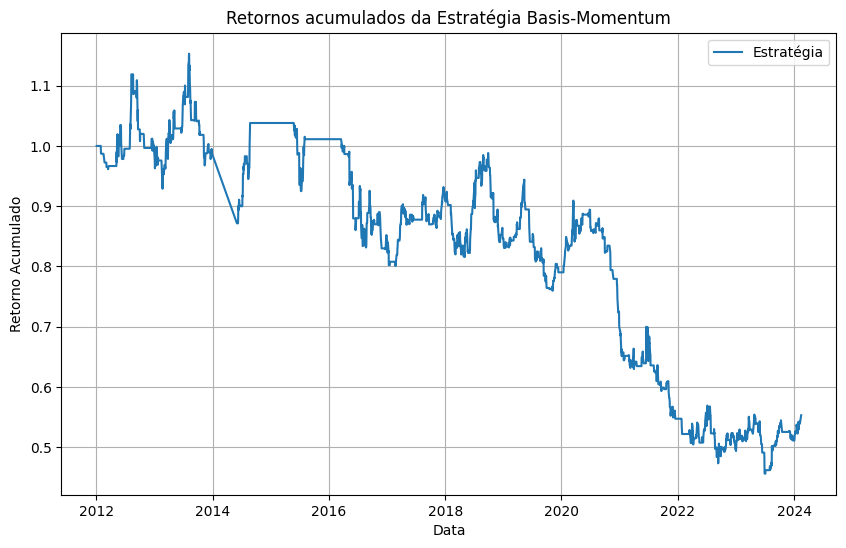

In [17]:
# Calcular retornos da estratégia
sinais['Retornos'] = sinais['Sinal_Final'].shift(1) * result_df.PRECOFUTURO.pct_change()

# Calcular retorno acumulado da estratégia
ret_acm = (1 + sinais['Retornos']).cumprod()

# Plotar o retorno acumulado da estratégia versus o benchmark
plt.figure(figsize=(10, 6))
plt.plot(ret_acm, label='Estratégia')  # Retorno acumulado da estratégia
plt.title('Retornos acumulados da Estratégia Basis-Momentum')
plt.xlabel('Data')
plt.ylabel('Retorno Acumulado')
plt.legend()
plt.grid(True)
plt.show()



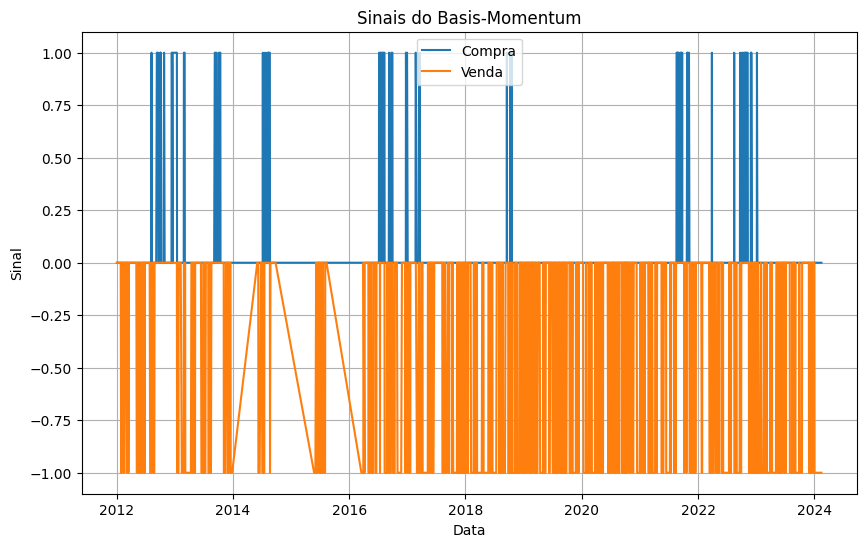

In [18]:
# Plotar os sinais
plt.figure(figsize=(10, 6))
plt.plot(sinais.Sinal_Compra, label='Compra')
plt.plot(sinais.Sinal_Venda, label='Venda')
#plt.plot(sinais.Sinal_Final, label='Decisão')
plt.title('Sinais do Basis-Momentum')
plt.xlabel('Data')
plt.ylabel('Sinal')
plt.legend()
plt.grid(True)
plt.show()

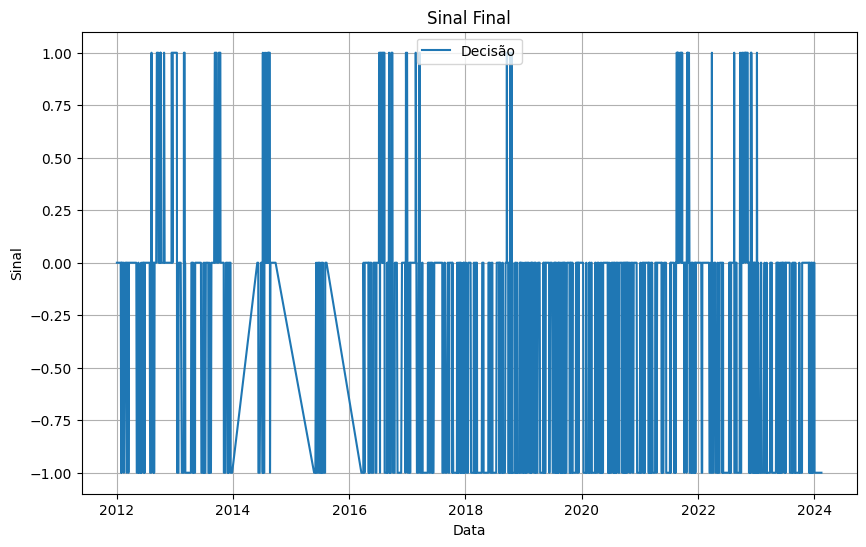

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(sinais.Sinal_Final, label='Decisão')
plt.title('Sinal Final')
plt.xlabel('Data')
plt.ylabel('Sinal')
plt.legend()
plt.grid(True)
plt.show()

# Estratégia Basis-Momentum 

## Difereça entre produtórios

$$
\text{Basis-Momentum}_t = \prod_{s=t-11}^{t} (1 + R_{\text{fut}, s}^1) - \prod_{s=t-11}^{t} (1 + R_{\text{fut}, s}^2)
$$

Onde $$ R_{\text{fut}, s}^1 $$    e    $$ R_{\text{fut}, s}^2 $$ são os retornos dos contratos futuros do primeiro-nearby e segundo-nearby, respectivamente, nos últimos 12 meses.

## Dados TradingView

In [20]:
%pip install --upgrade --no-cache-dir git+https://github.com/baselsm/tvdatafeed.git

  Running command git clone --filter=blob:none --quiet https://github.com/baselsm/tvdatafeed.git 'C:\Users\Lenovo\AppData\Local\Temp\pip-req-build-8ysrge8x'



  Cloning https://github.com/baselsm/tvdatafeed.git to c:\users\lenovo\appdata\local\temp\pip-req-build-8ysrge8x
  Resolved https://github.com/baselsm/tvdatafeed.git to commit cfc26940b273641116effa1b7c12982191b5a941
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'


In [21]:
from tvDatafeed import TvDatafeed, Interval

In [22]:
tv = TvDatafeed() #digitar n

you are using nologin method, data you access may be limited


In [23]:
soyN24 = tv.get_hist(symbol='ZSN2024', exchange='CBOT', interval=Interval.in_daily, n_bars= 5000) #julho
soyQ24 = tv.get_hist(symbol='ZSQ2024', exchange='CBOT', interval=Interval.in_daily, n_bars= 5000) #agosto

In [24]:
soyN24.index

DatetimeIndex(['2020-11-12 22:00:00', '2020-11-15 22:00:00',
               '2020-11-16 22:00:00', '2020-11-17 22:00:00',
               '2020-11-18 22:00:00', '2020-11-19 22:00:00',
               '2020-11-22 22:00:00', '2020-11-23 22:00:00',
               '2020-11-24 22:00:00', '2020-11-26 22:00:00',
               ...
               '2024-05-13 21:00:00', '2024-05-14 21:00:00',
               '2024-05-15 21:00:00', '2024-05-16 21:00:00',
               '2024-05-19 21:00:00', '2024-05-20 21:00:00',
               '2024-05-21 21:00:00', '2024-05-22 21:00:00',
               '2024-05-23 21:00:00', '2024-05-27 21:00:00'],
              dtype='datetime64[ns]', name='datetime', length=888, freq=None)

In [25]:
soyN24.index = soyN24.index.normalize()
soyQ24.index = soyQ24.index.normalize()

soyN24.index

DatetimeIndex(['2020-11-12', '2020-11-15', '2020-11-16', '2020-11-17',
               '2020-11-18', '2020-11-19', '2020-11-22', '2020-11-23',
               '2020-11-24', '2020-11-26',
               ...
               '2024-05-13', '2024-05-14', '2024-05-15', '2024-05-16',
               '2024-05-19', '2024-05-20', '2024-05-21', '2024-05-22',
               '2024-05-23', '2024-05-27'],
              dtype='datetime64[ns]', name='datetime', length=888, freq=None)

In [26]:
soyN24.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 888 entries, 2020-11-12 to 2024-05-27
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   symbol  888 non-null    object 
 1   open    888 non-null    float64
 2   high    888 non-null    float64
 3   low     888 non-null    float64
 4   close   888 non-null    float64
 5   volume  888 non-null    float64
dtypes: float64(5), object(1)
memory usage: 48.6+ KB


In [27]:
soyN24_close = soyN24.close
soyQ24_close = soyQ24.close

In [28]:
# Filtrar os dados dos últimos 12 meses
soyN24_12m = soyN24_close.last('12M')
soyN24_12m

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13108\961996524.py:2: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  soyN24_12m = soyN24_close.last('12M')


datetime
2023-06-01    1200.25
2023-06-04    1197.50
2023-06-05    1201.50
2023-06-06    1191.75
2023-06-07    1203.25
               ...   
2024-05-20    1236.25
2024-05-21    1246.25
2024-05-22    1239.25
2024-05-23    1248.00
2024-05-27    1241.00
Name: close, Length: 248, dtype: float64

In [29]:
# Agrupar os dados por mês e calcular a média
soyN24_12m = soyN24_12m.resample('M').mean()
soyN24_12m

datetime
2023-06-30    1266.137500
2023-07-31    1358.023810
2023-08-31    1358.532609
2023-09-30    1361.513158
2023-10-31    1336.858696
2023-11-30    1386.404762
2023-12-31    1341.473684
2024-01-31    1249.125000
2024-02-29    1183.225000
2024-03-31    1199.487500
2024-04-30    1177.931818
2024-05-31    1228.611111
Freq: M, Name: close, dtype: float64

In [30]:
soyQ24_12m = soyQ24_close.last('12M')
soyQ24_12m = soyQ24_12m.resample('M').mean()
soyQ24_12m

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13108\433220705.py:1: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  soyQ24_12m = soyQ24_close.last('12M')


datetime
2023-06-30    1249.200000
2023-07-31    1334.250000
2023-08-31    1338.978261
2023-09-30    1341.052632
2023-10-31    1318.739130
2023-11-30    1363.369048
2023-12-31    1321.763158
2024-01-31    1236.431818
2024-02-29    1176.975000
2024-03-31    1196.025000
2024-04-30    1178.545455
2024-05-31    1228.111111
Freq: M, Name: close, dtype: float64

### Retornos

In [31]:
soyN24_12m = soyN24_12m.to_frame(name='close')
soyN24_12m

,close
datetime,
2023-06-30,1266.137500
2023-07-31,1358.023810
2023-08-31,1358.532609
2023-09-30,1361.513158
2023-10-31,1336.858696
2023-11-30,1386.404762
2023-12-31,1341.473684
2024-01-31,1249.125000
2024-02-29,1183.225000


In [32]:
soyQ24_12m = soyQ24_12m.to_frame(name='close')
soyQ24_12m


,close
datetime,
2023-06-30,1249.200000
2023-07-31,1334.250000
2023-08-31,1338.978261
2023-09-30,1341.052632
2023-10-31,1318.739130
2023-11-30,1363.369048
2023-12-31,1321.763158
2024-01-31,1236.431818
2024-02-29,1176.975000


In [33]:
soyN24_12m['retorno'] = soyN24_12m['close'].pct_change()

# Preencher o NaN inicial com 0
soyN24_12m['retorno'].fillna(0, inplace=True)

soyN24_12m

,close,retorno
datetime,,
2023-06-30,1266.137500,0.000000
2023-07-31,1358.023810,0.072572
2023-08-31,1358.532609,0.000375
2023-09-30,1361.513158,0.002194
2023-10-31,1336.858696,-0.018108
2023-11-30,1386.404762,0.037062
2023-12-31,1341.473684,-0.032408
2024-01-31,1249.125000,-0.068841
2024-02-29,1183.225000,-0.052757


In [34]:
soyQ24_12m['retorno'] = soyQ24_12m['close'].pct_change()

# Preencher o NaN inicial com 0
soyQ24_12m['retorno'].fillna(0, inplace=True)
soyQ24_12m

,close,retorno
datetime,,
2023-06-30,1249.200000,0.000000
2023-07-31,1334.250000,0.068084
2023-08-31,1338.978261,0.003544
2023-09-30,1341.052632,0.001549
2023-10-31,1318.739130,-0.016639
2023-11-30,1363.369048,0.033843
2023-12-31,1321.763158,-0.030517
2024-01-31,1236.431818,-0.064559
2024-02-29,1176.975000,-0.048087


### Calculando a diferença dos retornos

In [35]:
import numpy as np

In [36]:
BMt = np.prod(1 + soyN24_12m.retorno) - np.prod(1 + soyQ24_12m.retorno)

BMt

-0.012756562818486916

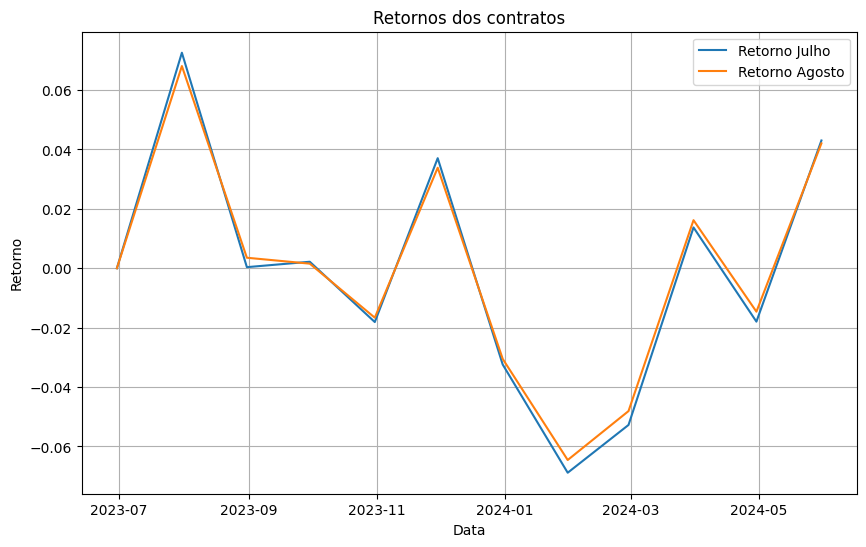

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(soyN24_12m.retorno, label='Retorno Julho')
plt.plot(soyQ24_12m.retorno, label='Retorno Agosto')
plt.title('Retornos dos contratos')
plt.xlabel('Data')
plt.ylabel('Retorno')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
a = np.array([1,2,3])
b = np.cumprod(a)
b

array([1, 2, 6])